# Data understanding

#### a) Define the question

Building a model to check who was more likely to survive, using available data and calculating the metrics

#### b) Metrics for success

The project will be considered successful if we are able to build a KNN classifier with a high accuracy.

#### c) Understanding the context

The Titanic was a luxury ship, which at its time, was the largest ship afloat, and was the second of three Olympic-class ocean liners operated by the White Star Line. On its maiden voyage on 15th April 1912, it hit an iceberg, leading to the deaths of over 1500 passengers and crew, of the 2240 on board.

It had people from diverse backgrounds on board, from high-ranking officials, wealthy industrialists, dignitaries, celebrities and mostly common folk , who had paid less than USD20 to make the crossing

We have been provided with 2 datasets to build a model prediction from to check the possibility of survival.

#### d) Recording the experimental design 

The following steps will be followed during this exercise:
- Data Understanding
- Data Preparation
- Data Cleaning
- Perform EDA
- Modelling with KNN
- Evaluation
- Challenging the solution

#### e) Data relevance. 

The data collected was saved in  .csv formart. It contains the following columns:
- PassengerID: passenger's unique ID.
- Survived(On train): whether a passenger survived(1) or not(0).
- Pclass: Train class(1st, 2nd or 3rd)
- Name: Passenger's name.
- Sex: Passenger's sex.
- Age: Passenger's age.(It is fractional if less than 1. If the age is estimated, is it in the form of xx.5)
- SibSp: Number of siblings or spouse on board the Titanic. It defines family relations in this way:
  * Sibling = brother, sister, stepbrother, stepsister
  * Spouse = husband, wife (mistresses and fiancés were ignored)
- Parch: Number of parents or children on board the Titanic. It defines family relations in this way:
  * Parent = mother, father
  * Child = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore parch=0 for them.
- Ticket: Ticket Number.
- Fare: Passenger fare.
- Cabin: Cabin number.
- Embarked: Point of Embarkation(C = Cherbourg, Q = Queenstown or S = Southampton).

# Data preparation

## Importing the libraries. 

In [214]:
# Import all necessary libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics




## Reading the Data 

In [161]:
# Loading our datsets
train = pd.read_csv('train (5).csv')
test = pd.read_csv('test (1).csv')

In [162]:
# Previewing the first 10 records of train dataframe
#
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [163]:
# Previewing the first 10 records of test dataframe
#
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [164]:
# Previewing the last 10 records of train dataframe
#
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [165]:
# Previewing the last 10 records of test dataframe
#
test.tail(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [166]:
# Setting Passenger ID as index since it already is our unique identifier
#
train = train.set_index('PassengerId')
test = test.set_index('PassengerId')

#Preview tes dataframe to confirm
#
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploring the Data

In [167]:
# Checking the number of rows and columns
#
print(train.shape)
print(test.shape)


(891, 11)
(418, 10)


> Our train dataset has 11 columns and 891 entries, while the test dataset has 10 olumns and 418 rows, tus a total of 1309 entries in both.

In [168]:
# Checking the column datatypes
#
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       33

> All the columns in the dataset seem to have the appropriate datatype. 

# Data Cleaning
We shall tidy our dataset using the data integrity rules: Validity, Accuracy, Completeness, Consistency & Uniformity

In [169]:
# Checking our column names
#
print(train.columns)
print(test.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


> Our column titles have no issues, however for consistency, we will change them to lowercase.

In [170]:
# Changing column titles to lower case
#
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()
# Previewing the columns to confirm whether the changes have taken effect
#
print(train.columns)
print(test.columns)

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')
Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked'],
      dtype='object')


> Our column titles are now all consistent.

In [171]:
# Checking for the missing values
print(train.isna().sum())
print(test.isna().sum())

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64
pclass        0
name          0
sex           0
age          86
sibsp         0
parch         0
ticket        0
fare          1
cabin       327
embarked      0
dtype: int64


> We have quite some missing data on the age & cabin columns for both datasets. We also have 2 entries on 'embarked' column with nulls. We will drop the 'embarked' & 'fare' nulls, however, we wont be dropping for the other columns since we'd be losing a huge chunk of our data.
>
> We shall create a box plot for age column to check for outliers so as to know the appropriate measure of central tendency to impute.

In [172]:
#Dropping the missing values in the fare and embarked column in both in the train and test set
train = train.dropna(subset = ['embarked'])
test = train.dropna(subset = ['fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


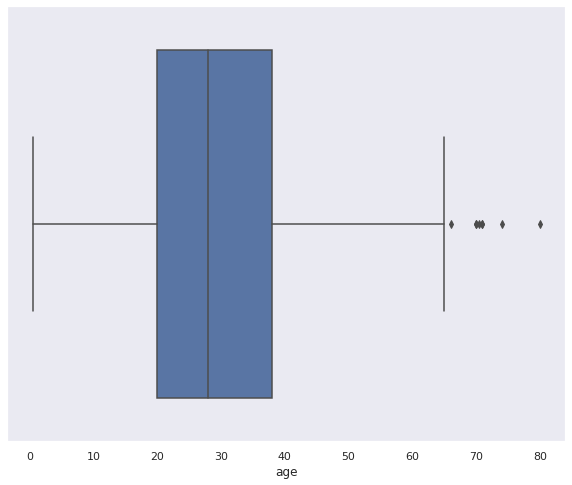

In [173]:
# Box plot for age, train set
#
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(train.age)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


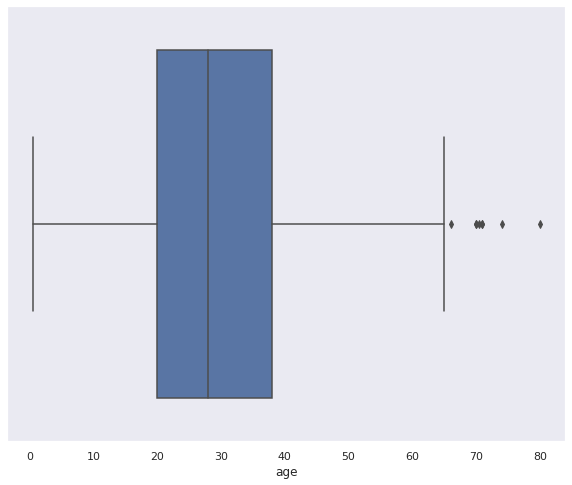

In [174]:
# Box plot for age, test set
#
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(test.age)

> Our age columns do not have significant outliers, thus we shall impute with the mean

In [175]:
# Imputing the mean for the age columns
#
train['age'].fillna(train["age"].mean(), inplace=True)
test['age'].fillna(test["age"].mean(), inplace=True)

# Checking for the missing values
#
print(train.isna().sum())
print(test.isna().sum())

survived      0
pclass        0
name          0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      0
dtype: int64
survived      0
pclass        0
name          0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      0
dtype: int64


> We'll drop the cabin column since we shall use the pclass to give us information on the passenger's social status, which would determine their cabin location

In [176]:
# Dropping cabin column
#
train.drop(['cabin'],axis = 1)
test.drop(['cabin'],axis = 1)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.642093,1,2,W./C. 6607,23.4500,S


In [177]:
# Checking for duplicates
#
print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


> No duplicates

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


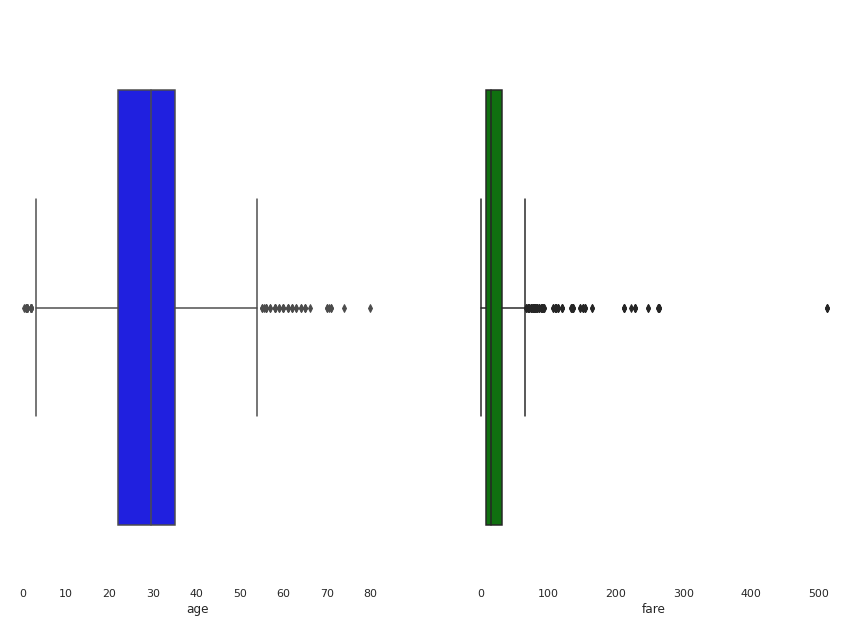

In [178]:
# Checking for outliers, train
#
#Defining the columns to check for outliers.
#
cols = ['age','fare']
#Defining the colors to be used in the boxplots
#
colors = ['blue','green']

#Used a for loop to plot boxplots for each of the selected columns.
#
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,10))
plt.suptitle('Checking for outliers',fontsize=15,y=0.92,color='white')
for ax,data,column,color in zip(axes.flatten(),train,cols,colors):
  sns.boxplot(train[column], ax=ax, color=color)
  ax.set_facecolor('white')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


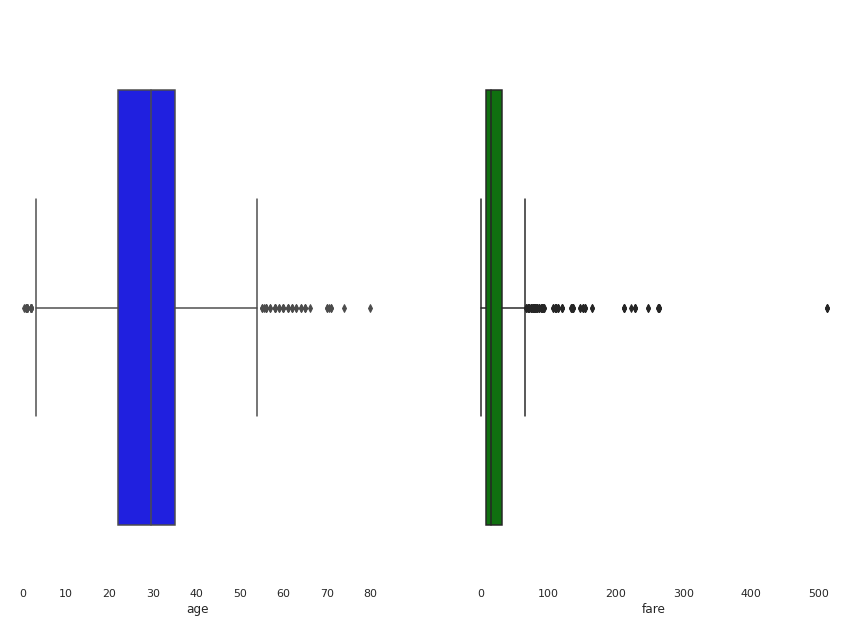

In [179]:
# Checking for outliers, train
#
#Defining the columns to check for outliers.
#
cols = ['age','fare']
#Defining the colors to be used in the boxplots
#
colors = ['blue','green']

#Used a for loop to plot boxplots for each of the selected columns.
#
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,10))
plt.suptitle('Checking for outliers',fontsize=15,y=0.92,color='white')
for ax,data,column,color in zip(axes.flatten(),test,cols,colors):
  sns.boxplot(test[column], ax=ax, color=color)
  ax.set_facecolor('white')


> We won't drop our outliers for now

## Feature Engineering

In [180]:
# We would like to know the family size of our passengers
# We will use the 'sibsp' & 'parch' columns to get the family size. We will also add in '1' to cater for the individual
#
train['family_size'] = train['sibsp'] + train['parch'] + 1
test['family_size'] = test['sibsp'] + test['parch'] + 1

In [181]:
# We will also replace the initials on Point of embarkation with the acual name
#
train['embarked'] = train['embarked'].replace(['C','Q','S'],['Cherbough','Queenstown','Southampton'])
test['embarked'] = test['embarked'].replace(['C','Q','S'],['Cherbough','Queenstown','Southampton'])

In [182]:
# We will now drop irrelevant columns
#
train = train.drop(['name', 'sibsp', 'parch', 'cabin', 'ticket'], axis = 1)
test = test.drop(['name', 'sibsp', 'parch', 'cabin', 'ticket'],axis = 1)


In [183]:
# Previewing our datsets
#
train.head()

,survived,pclass,sex,age,fare,embarked,family_size
PassengerId,,,,,,,
1,0,3,male,22.0,7.2500,Southampton,2
2,1,1,female,38.0,71.2833,Cherbough,2
3,1,3,female,26.0,7.9250,Southampton,1
4,1,1,female,35.0,53.1000,Southampton,2
5,0,3,male,35.0,8.0500,Southampton,1


In [184]:
# Previewing our datsets
#
test.head()

,survived,pclass,sex,age,fare,embarked,family_size
PassengerId,,,,,,,
1,0,3,male,22.0,7.2500,Southampton,2
2,1,1,female,38.0,71.2833,Cherbough,2
3,1,3,female,26.0,7.9250,Southampton,1
4,1,1,female,35.0,53.1000,Southampton,2
5,0,3,male,35.0,8.0500,Southampton,1


# Performing EDA

## Univariate 

### Measures of Central Tendency & Dispersion

In [185]:
# We shall concatenate the train and test data for the Exploratory Data Analysis
#
df = pd.concat([train, test], sort = False)

# Checking it's shape
#
df.shape

(1778, 7)

In [187]:
# Impute the nulls in 'survived' columns from the test data with 0, since they are assumed not to have survived
#
df['survived'] = df['survived'].fillna(0)

df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
fare           0
embarked       0
family_size    0
dtype: int64

In [200]:
# Plotting the univariate summaries and recording our observations for our combined datasett
#

df_num = df[['survived', 'age','pclass', 'fare', 'family_size']]
def uni_stats(df):
  out_df = pd.DataFrame(columns=['Count', 'Unique', 'Mode', 'Mean', 'Min','25%', 'Median', '75%', 'Max', 'Range', 'Std_dev', 'Skew', 'Kurt' ])


  for col in df:
    out_df.loc[col] = [df_num[col].count(), df_num[col].nunique(), df_num[col].mode().values[0], df_num[col].mean(), df_num[col].min(), df_num[col].quantile(0.25), df_num[col].median(), df_num[col].quantile(0.75), df_num[col].max(),df_num[col].max()-df_num[col].min(), df_num[col].std(), df_num[col].skew(), df_num[col].kurt()]
  return out_df

uni_stats(df_num)

,Count,Unique,Mode,Mean,Min,25%,Median,75%,Max,Range,Std_dev,Skew,Kurt
survived,1778.0,2.0,0.000000,0.382452,0.00,0.0000,0.000000,1.0,1.0000,1.0000,0.486123,0.484158,-1.767580
age,1778.0,89.0,29.642093,29.642093,0.42,22.0000,29.642093,35.0,80.0000,79.5800,12.964697,0.433988,0.974417
pclass,1778.0,3.0,3.000000,2.311586,1.00,2.0000,3.000000,3.0,3.0000,2.0000,0.834465,-0.636460,-1.269244
fare,1778.0,247.0,8.050000,32.096681,0.00,7.8958,14.454200,31.0,512.3292,512.3292,49.683519,4.797383,33.410826
family_size,1778.0,9.0,1.000000,1.906637,1.00,1.0000,1.000000,2.0,11.0000,10.0000,1.614248,2.721590,9.106583


> Our dataset has 1778 values.
>
> For 'survived' column,our mode is 0, showing that most of the passengers did not survive. It's mean is 0.38 which since the values are either 0 or 1, is 0. It has a minimum values of 0, a max of 1, thus its range is 1. It is positively skewed, and platykurtic in nature.
>


### Plots

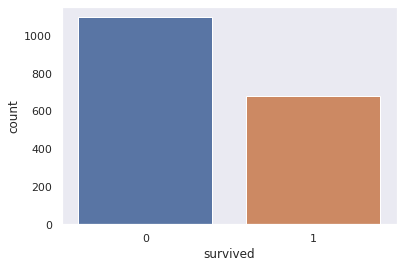

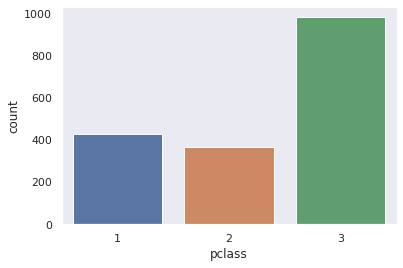

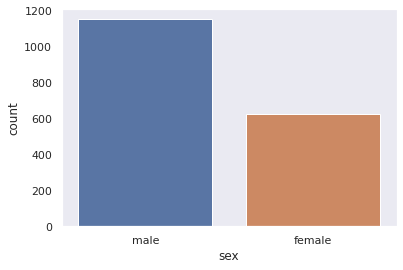

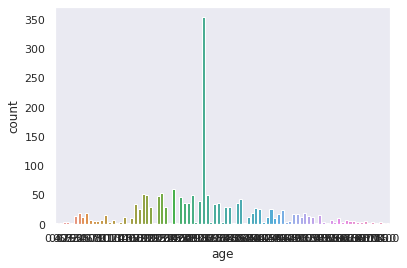

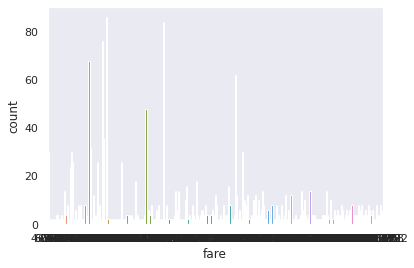

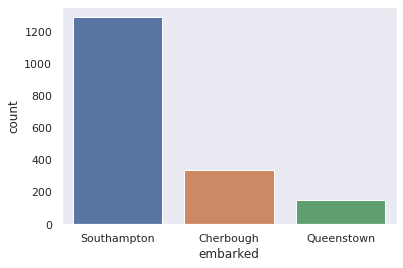

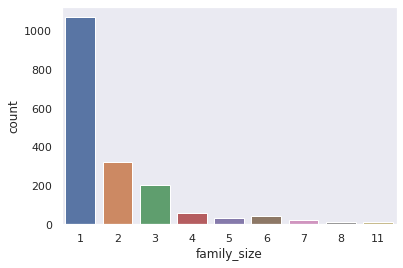

In [194]:
# Plotting distributions of passengers across the different columns
#
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df)


> From our plots above, we can see that most of the passengers did not survive the crash

?????
>
> From our summary statistics earlier, we had seen that our modal age was 51. From our plot, we can see that that age has more than 5 times as many patients as compared to the other ages.
>
> We can also see that most of our patients were female. Actually, the male patients correspond to less than half of the total female patients. 
> 
> Patients who are currently on thyroxine correspond to less than a quarter of those who aren't.
>
> The values for patients with quesries on thyroxine, hypothyroidism & hyperthyroidoism are significantly low as compared to those without.
>
> Patients who are on anti-thyroid medication, have had thyroid surgery,are pregnant, sick, have a tumor or goitre, are extremely low as compared to those who have none of those conditions.
>
> We shall check on the relationships between our tests and other variables to comment appropriately on them, although we do have plots on their distributions as shown. Most patients were tested f

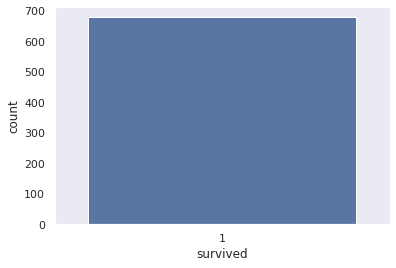

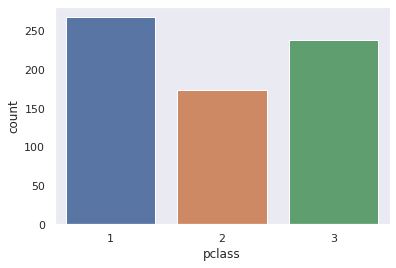

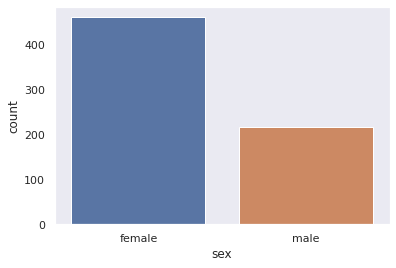

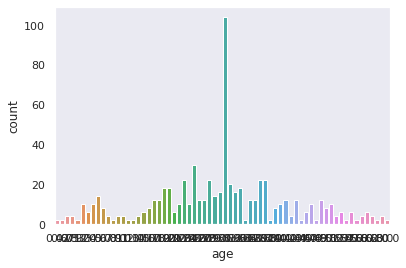

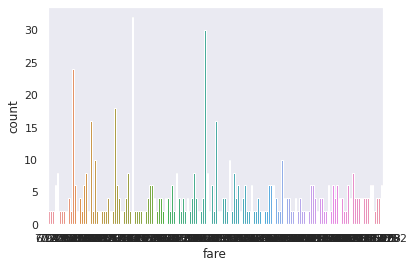

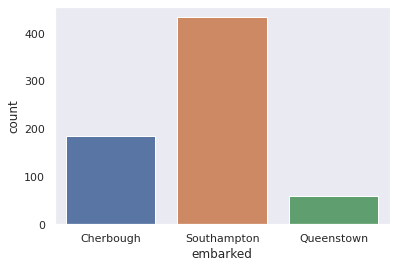

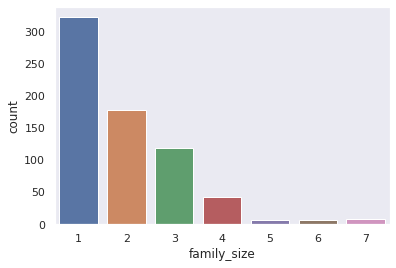

In [195]:
# Plotting distribution of passengers who survived the crash
#
df1 = df[df['survived'] == 1]

for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df1)

> ??????

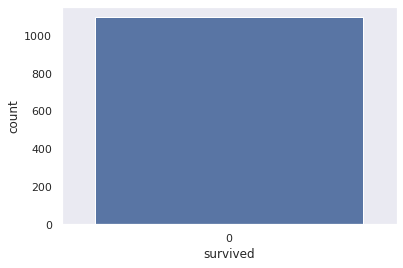

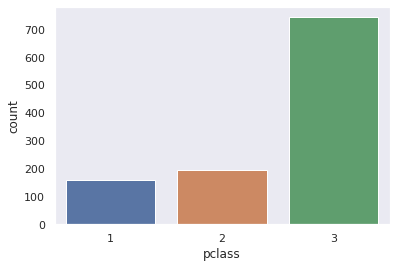

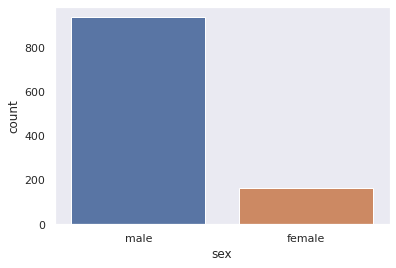

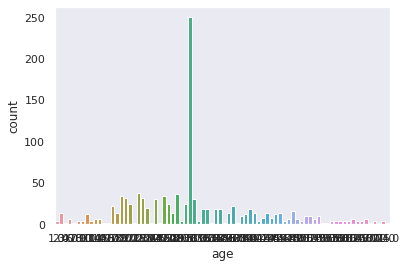

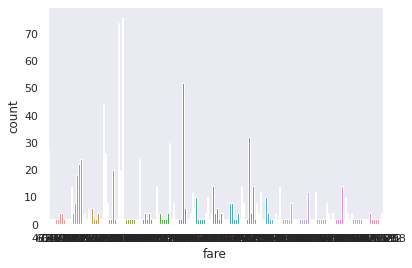

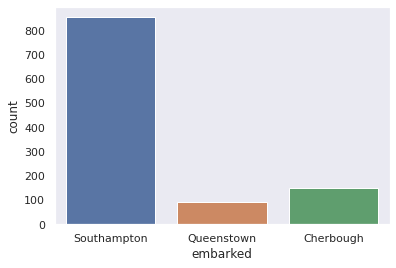

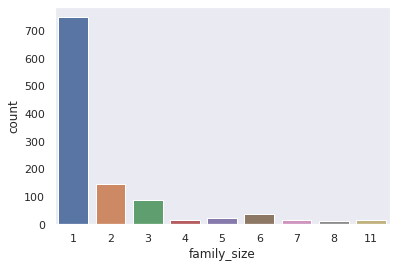

In [196]:
# Plotting distribution of passengers who did not survive the crash
#
df1 = df[df['survived'] == 0]

for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df1)

## Bivariate 

<Figure size 480x320 with 0 Axes>

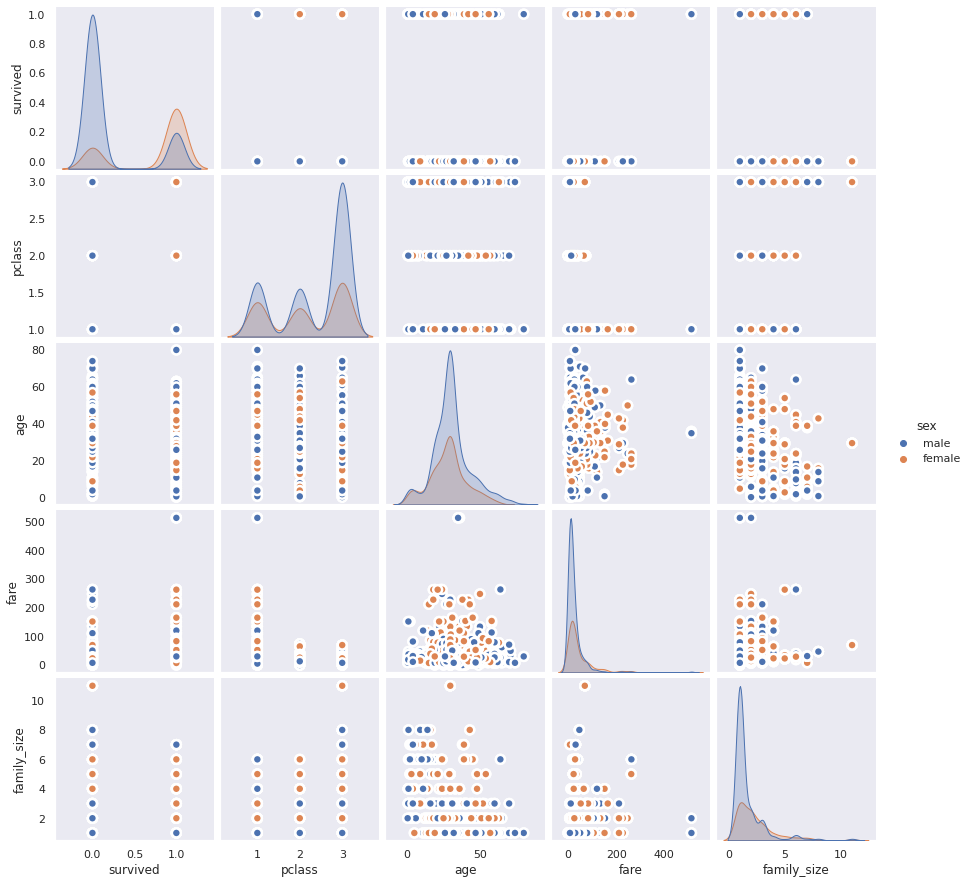

In [197]:
# Ploting our bivariate summaries and recording our observations
#
plt.figure(dpi= 80)
sns.pairplot(df, kind="scatter", hue="sex", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

> We can see the relationships in our dataset. Let's check this further in our correlation plot

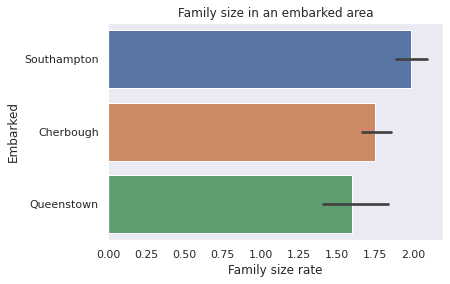

In [206]:
# Plotting the family size per embarked area.
#
df_2 = df.groupby('embarked').mean()

sns.barplot(x=df['family_size'], y=df['embarked'], data=df_2)
plt.xlabel('Family size rate')
plt.ylabel('Embarked')
plt.title('Family size in an embarked area')
plt.show()

> Southampton has the highest number of family members, with Queenstown having the lowest family sizes.

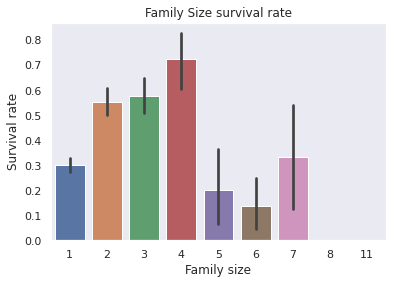

In [208]:
# Plotting the survival rate per family size
#
df_3 = df.groupby('survived').count()

sns.barplot(x=df['family_size'], y=df['survived'], data=df_3)
plt.xlabel('Family size')
plt.ylabel('Survival rate')
plt.title('Family Size survival rate')
plt.show()

> We can see that family size with the highest survival rate is a family size of 4. Family sizes of 6 have the lowest survival rates.

In [202]:
# Check for correlation
#
correlation = df_num.corr()
correlation

,survived,age,pclass,fare,family_size
survived,1.000000,-0.074513,-0.335549,0.255290,0.018277
age,-0.074513,1.000000,-0.328256,0.088780,-0.247459
pclass,-0.335549,-0.328256,1.000000,-0.548193,0.064221
fare,0.255290,0.088780,-0.548193,1.000000,0.218658
family_size,0.018277,-0.247459,0.064221,0.218658,1.000000


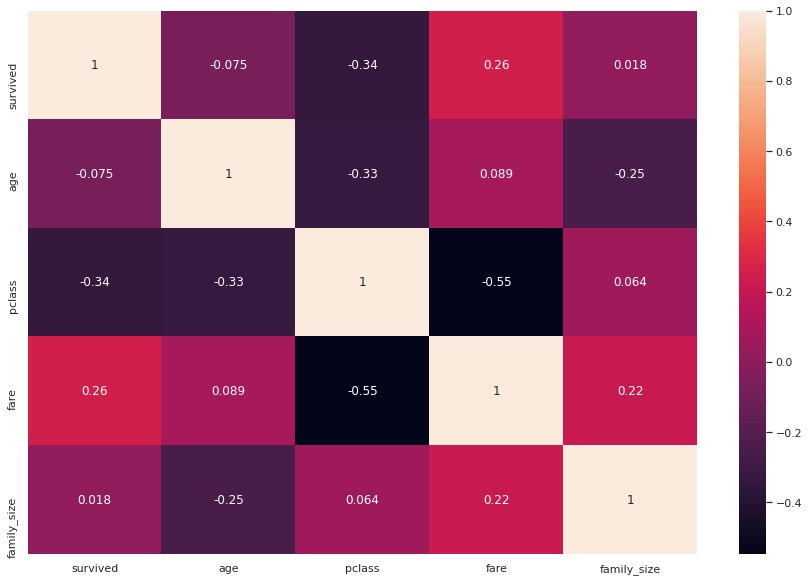

In [203]:
# Plotting a correlation heatmap
#
plt.figure(figsize = (15,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

> There are no columns with high positive correlations. The amount of fare and whether one survived have a low positive correlation of 0.26. The fare and family size also have a low positive correlation. There is also a very low positive correlation between one's survival, their class and family size.There is a medium negative correlation between the fare paid and one's class. 

## Multivariate

In [213]:
# We shall apply Linear Discriminant Analysis since this is a supervised machine learning

lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
factors = pd.DataFrame (index = X.columns.values, data = lda.coef_[0].T)
factors.sort_values(0, ascending = False)

,0
fare,0.138294
embarked_Queenstown,0.120028
embarked_Southampton,-0.279194
family_size,-0.438488
age,-0.732098
pclass,-1.090929
sex_male,-1.952501


> The factors that determine one's survival wer fare and whether one embarked in Queenstown. Those that would have caused one's death are factors such as the family size, sex, their class, age and whether they embarked in Southampton.

# Modelling 


#### Checking for Multicollinearity

In [209]:
# We will use the VIF core to check our multicollinearity
#
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)


,survived,age,pclass,fare,family_size
survived,1.184134,0.243284,0.419478,-0.101327,0.033777
age,0.243284,1.241843,0.495488,0.042009,0.261852
pclass,0.419478,0.495488,1.795426,0.875079,-0.191701
fare,-0.101327,0.042009,0.875079,1.587355,-0.391039
family_size,0.033777,0.261852,-0.191701,-0.391039,1.161995


> All of our columns have no multicollinearity. They each have very low VIF scores.

### Baseline Model

In [211]:
# Defining the predictor and target variables in our dataset.
#
X = train.drop(['survived'],axis=1)
y = train['survived']

# One hot encoding our data for the categorical variables
#
X = pd.get_dummies(X, drop_first=True)

# Splitting our dataset
#
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

# Scaling the predictor variables
#
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Fitting the data in a logistic regression
#
regressor = LogisticRegression()
regressor.fit(X_train,y_train)

# Predicting classification using the test set
#
y_predict = regressor.predict(X_test)

# Getting the metrics for assessing our baseline model
#
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[85 20]
 [30 43]]
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       105
           1       0.68      0.59      0.63        73

    accuracy                           0.72       178
   macro avg       0.71      0.70      0.70       178
weighted avg       0.72      0.72      0.72       178



> Our f1-score of our baseline model is at 77%, meaning that we have generally low false positives and low false negatives.
>
> Our model's accuracy is 72%, which is not high enough for us.

## K Nearest Neighbours
The k-NN is a non parametric method that does not make any assumptions of the underlying data distribution. Therefore we need no prior fitting or transformation of the data. But we will standardize our numerical columns for better analysis.

In [215]:
# Defining the predictor variables and target column
#
X = train.drop(['survived'],axis=1)
y = train['survived']
scaler = StandardScaler()
# Standardizing our numerical columns which are the age and fare columns
#
X[['age','fare']] = scaler.fit_transform(X[['age','fare']])

# One hot encoding any categorical columns in our dataset
#
X = pd.get_dummies(X, drop_first=True)

# Splitting our dataset into the test and train 
#
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)
 
# Choosing an odd number 3 to help us classify our data
#
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [216]:
# Predict new values using our test data
#
y_pred = classifier.predict(X_test)

# Printing out the various metrics
#
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[89 18]
 [16 55]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.75      0.77      0.76        71

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



> We got a score of 84% up from 77%. Our accuracy score is also 81%, up from 72%. This is better performance, but it can be made better by hyperparameter tuning.

# Evaluation

> From all the models, we have calculated the accuracy score, as well as the RMSE and included the conclusions in each section.
>
> The tuned AdaBoost model had the lowest RMSE score with a high accuracy score, thus is my preferred model. It had  an RMSE of 0.01686 with an accuracy of 98.31%
>
> We also noted that the most important features in the tuned AdaBoost were the FTI levels and TSH levels. 
>
>Thus it is our recommendation that we use the AdaBoost with FTI & TSH as our independent variables to get the most accurate predictions of whether a patient has hypothyroidism.
